# Making Business Decisions Based on Data PROJECT

## introduction

the goal of the project-
as an analyst in a big on-line shop we together with marketing are trying tocheck out a few hypothesis and then carry out an A/B test 

in this project we will prioritize hypothesis by ICE and RICE and will take a A/B test and analyze the results and at last give a decision if to stop or continue the test.

we will start downloading the data sets and studying it and then carrying out the test and analyze it

## part 1 Prioritizing Hypotheses

In [2]:
import pandas as pd
import numpy as np
from datetime import date
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
hypo = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
hypo


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypo.isnull().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

we downloaded the data and check there are no missing values and it looks o.k. so we can start with the ICE and RICE calculations  

In [6]:
hypo['ICE']= (hypo['Impact']* hypo['Confidence']) / hypo['Effort']
hypo.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


we can see that the most rated hypothesis by the ICE calculate is the number 8 and it has a gap with number 0 and 7. now let us find the RICE and compare them

In [7]:
hypo['RICE']= (hypo['Reach']* hypo['Impact']* hypo['Confidence']) / hypo['Effort']
hypo.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


from the RICE priority  we see that hypothesis number 7 is way high prioritzed from the others. after that  we have 2 and 0. we see that 7 and 0 are both in the top 3 hypothesis. 

the diffrence between the ICE and RICE is that the ICE  takes the impact the change we make and the confidence it will work and divide it by the effort it will take to test this hypothesis.
the RICE thakes in mind the impact of the change, the confidence it will work and the reach that means how many users will be affected immediately from the change and devide it all by the effort it takes to test it. 
there is a diffrence between them but i think the RICE method is better to use since it takes in mind more parameters so it is more accurate. 
in our hypothesis list number 7 is on top of both metrics so we should test it out first

##PART 2
A/B Test Analysis

In [7]:
orders= pd.read_csv('/datasets/orders_us.csv', sep=',')
visits= pd.read_csv('/datasets/visits_us.csv', sep=',')


In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [11]:
orders.duplicated().sum()

0

we see that all rows are full up and the columns type are o.k. and there are no duplicates so we can start working with it

In [12]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [15]:
visits.duplicated().sum()

0

we can see that the visits table is o.k. with no missing rows or duplicates so now we can start analyzing our A/B test 

1. first we need to group the data to a pair group of date and the group the user belongs to and cut out duplicates and gather data that we can plot a graph with cumulative revenue data

In [16]:
dg = orders[['date','group']].drop_duplicates()

In [17]:
ordersagg = dg.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
visitsagg = dg.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
cumd = ordersagg.merge(visitsagg, left_on=['date', 'group'], right_on=['date', 'group'])
cumd.head()

,date,group,transactionId,visitorId,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


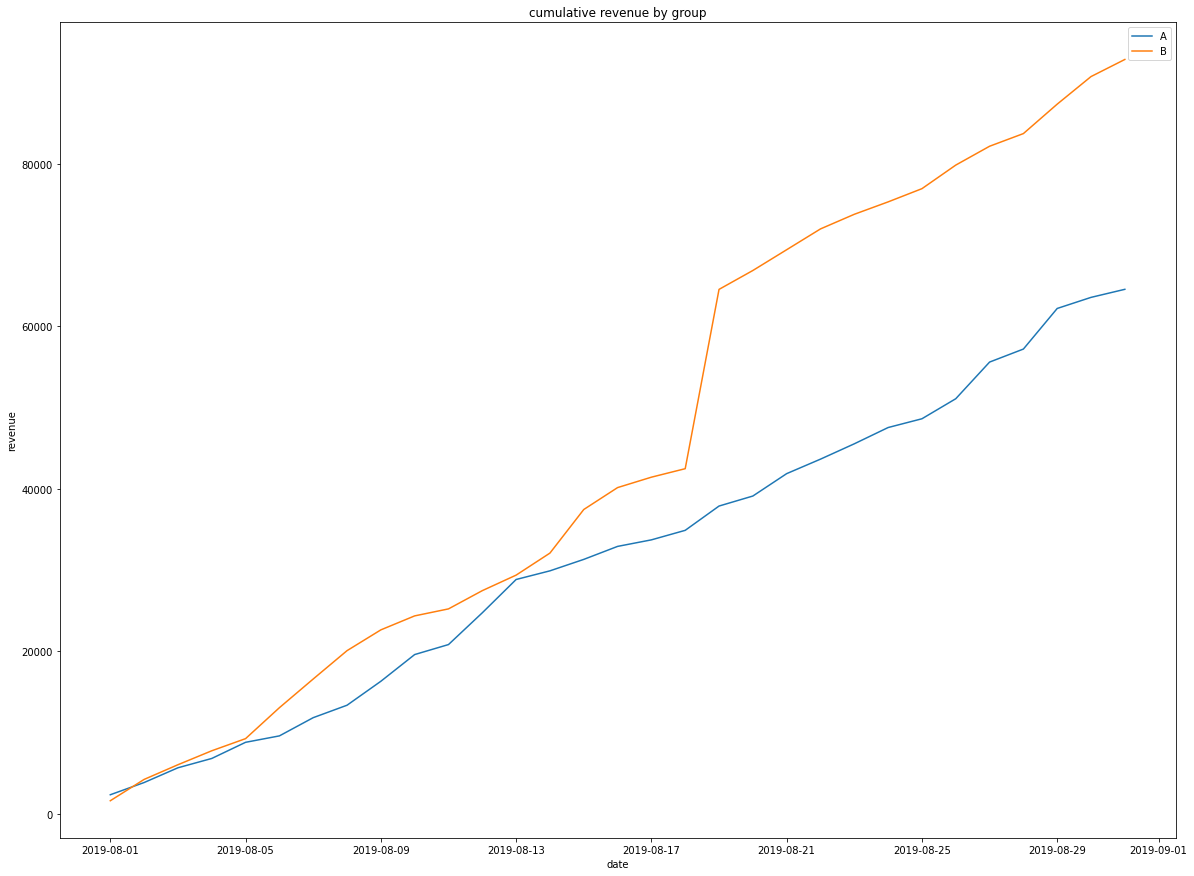

In [20]:
cra = cumd[cumd['group']=='A'][['date','revenue', 'transactionId']]

crb = cumd[cumd['group']=='B'][['date','revenue', 'transactionId']]
 
plt.figure(figsize=(20,15))
plt.title('cumulative revenue by group')
plt.xlabel('date')
plt.ylabel('revenue')
plt.plot(cra['date'], cra['revenue'], label='A') 
plt.plot(crb['date'], crb['revenue'], label='B')
plt.legend()

we see that group b has a mouch better and higher revenue than group a especially after 2 weeks that it growth in a jump. we can maybe say that the time we satrted the change it effected the group but a few users needed more time to adjust to the change but after two weeks it proves itself. forthe two first weeks group a and b are almost the same so we need to carry on the test for at least 3 weeks

2. now let us plot a graph to show the cumulative avrage order size and see if in this critiea there is a diffrence between a and b

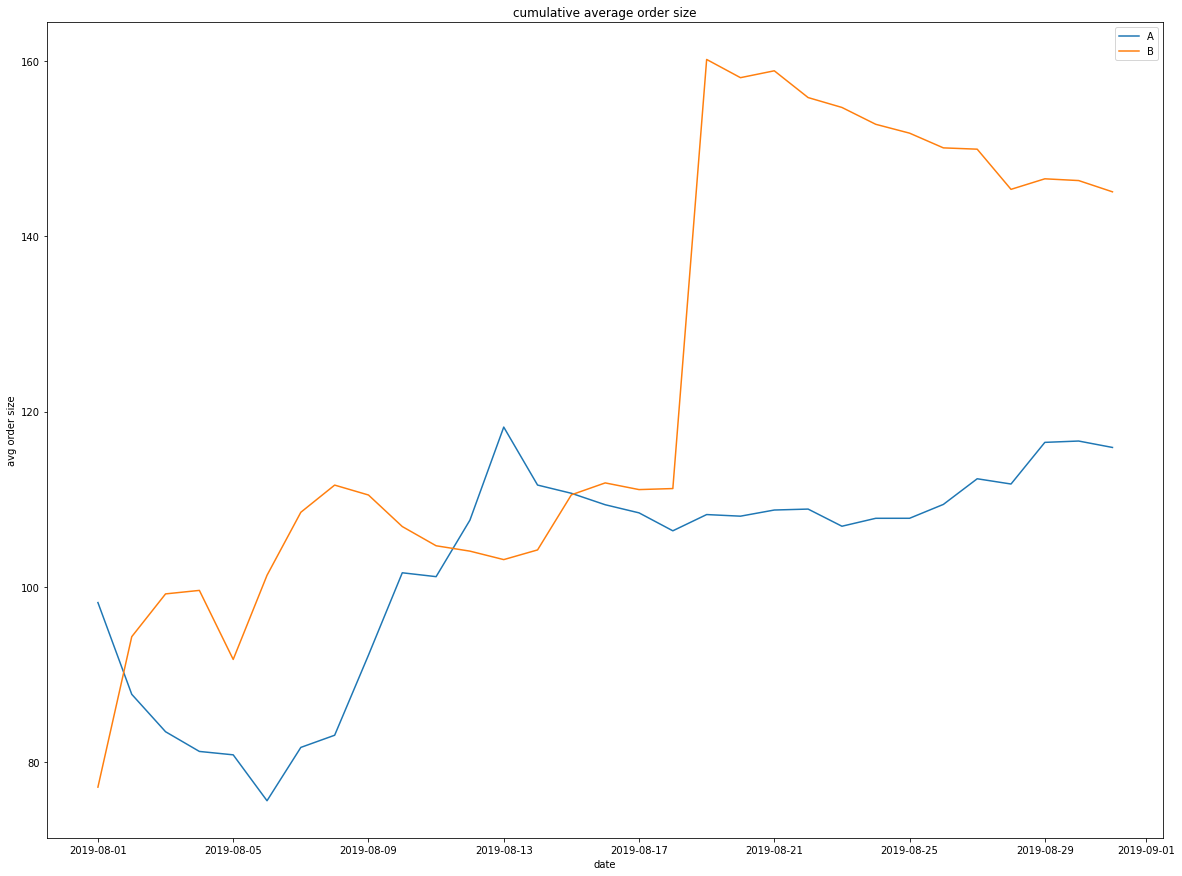

In [21]:
plt.figure(figsize=(20,15))
plt.title('cumulative average order size')
plt.xlabel('date')
plt.ylabel('avg order size')
plt.plot(cra['date'], cra['revenue']/cra['transactionId'], label='A')
plt.plot(crb['date'], crb['revenue']/crb['transactionId'], label='B')
plt.legend()

here we see that the b group has a growing and bigger order size than group a. this is very out standing day 17 and up because it is a very big diffrence.it could be because it is the end of summer brake or maybe the new addaption we are checking is a far well change 

3. now let us check the relative diffrence in avrage order size between a and b  

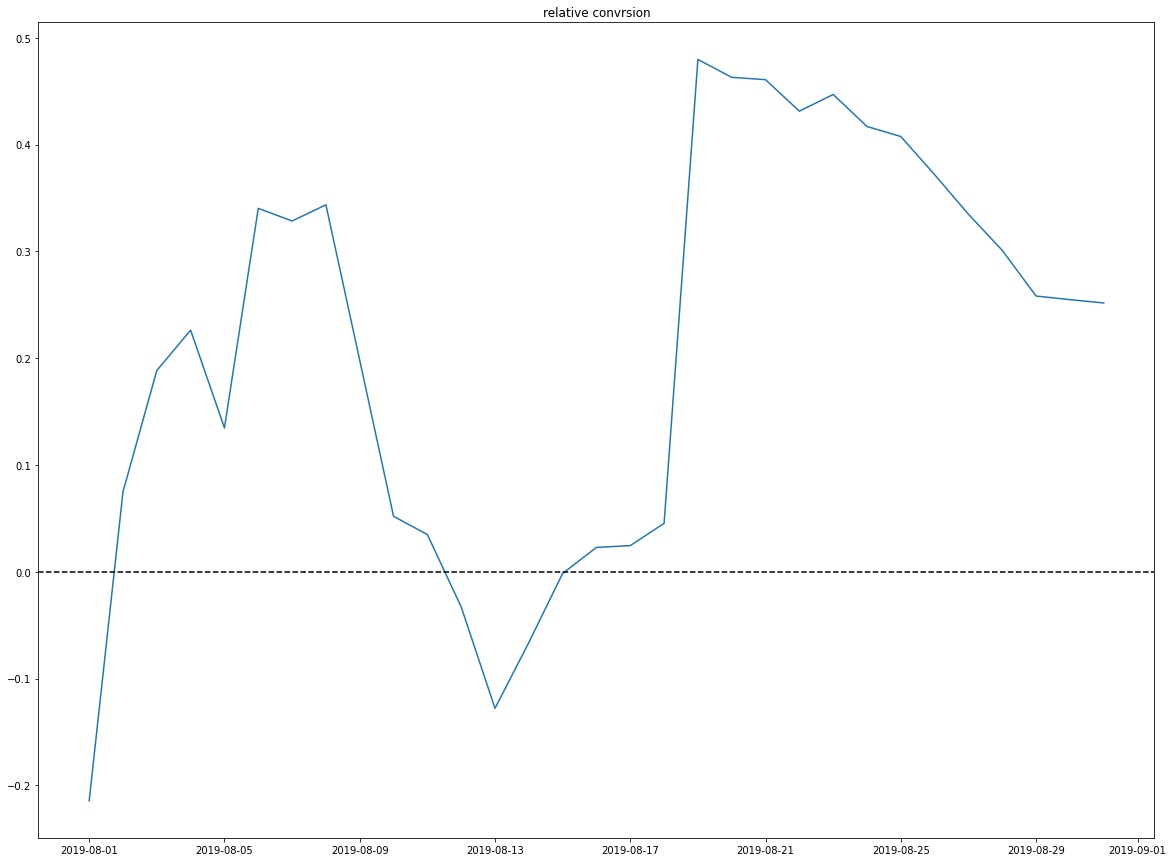

In [22]:
mergecr = cra.merge(crb, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20,15))
plt.plot(mergecr['date'], (mergecr['revenueB']/mergecr['transactionIdB'])/(mergecr['revenueA']/mergecr['transactionIdA'])-1)
plt.title('relative convrsion')
plt.axhline(y=0, color='black', linestyle='--')

the diffrence between A and B is preaty big for most of the time and it only increases. it seems like the change is good for buisness but the line in the graph is stating to come down so what will happen if we go on with the test? will it increase or stay stable? i think a month is a lot for a test and we see the diffrence that was influance on group b

4. now let plot the convertion rate for each group

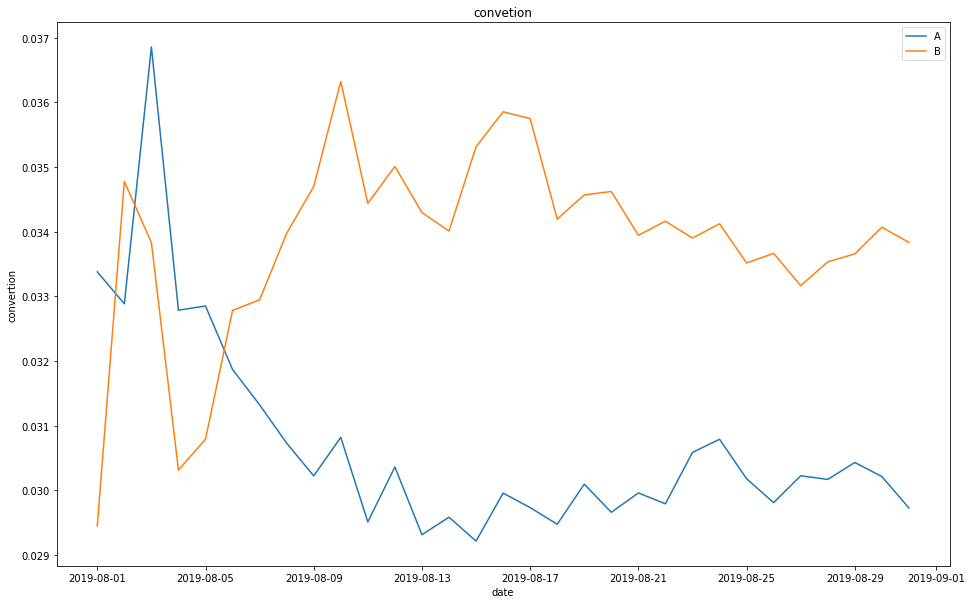

In [23]:
cumd['conversion'] = cumd['transactionId']/cumd['visits']
cumda = cumd[cumd['group']=='A']
cumdb = cumd[cumd['group']=='B']

plt.figure(figsize=(16,10))
plt.title('convetion')
plt.xlabel('date')
plt.ylabel('convertion')
plt.plot(cumda['date'], cumda['conversion'], label='A')
plt.plot(cumdb['date'], cumdb['conversion'], label='B')
plt.legend()



we learn from the graph that it takes between 2 and 4 days to convert, group A stats high and takes a peak but as time goes on it drops drastically. group B starts to convert from a lower point and has a big peak and drop in the first 4 days but then it climbes up fast and keeps it for the rest of the test period. another thing we can see is that the shape of the convetion line looks the same but in a diffrent hight so we can say that the convetion rate is stabled on it is better on group B.  

No handles with labels found to put in legend.


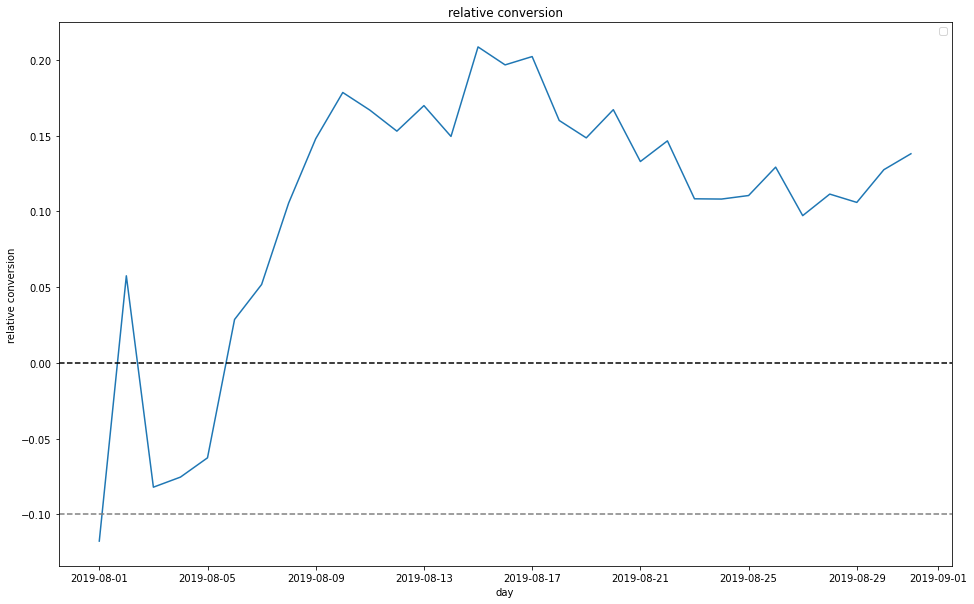

In [24]:
mcc = cumda[['date','conversion']].merge(cumdb[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16,10))
plt.plot(mcc['date'], mcc['conversionB']/mcc['conversionA']-1)
plt.legend()
plt.title('relative conversion')
plt.xlabel('day')
plt.ylabel('relative conversion')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')



now we checked the relative conversion ratio between groups A and B we see that group B is getting far away from group A. this is possible and we see it hapen but is there no outliers or some unusual case here because if not the test could be finished and we can say that group B is a great succes 

5. now we are plotting a scatter for number of orders per user
at first we make a table of user and order and then we showit in a scatter table

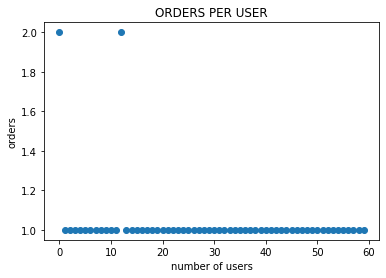

In [25]:
orderperuser = (
    cumd.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orderperuser.columns = ['uid', 'orders']

xsc = pd.Series(range(0,len(orderperuser)))
plt.title('ORDERS PER USER')
plt.xlabel('number of users')
plt.ylabel('orders')
plt.scatter(xsc, orderperuser['orders'])
xsc = pd.Series(range(0,len(orderperuser)))

we see that most of the users make 1 order and only a few make 2 orders that means that there a lot of user becuase we saw before large rates of order size  and revenue and if the users purchase only once that means there are a lot of users. or there are hugh outliers

6. now let's find the percentile of 90,95 and 99

In [26]:
print(np.percentile(orderperuser['orders'], [90,95,99]))

[1. 1. 2.]


we see that over 99 percent have only 1 purchase and only one percenrtage have 2 orders so we can decide that 2 orders are anomaly

7. now let us find the price for each order and scatter it

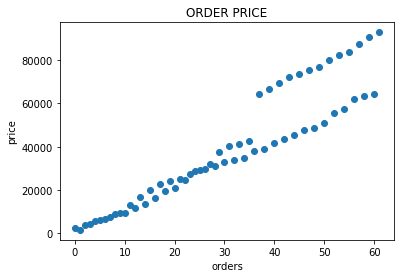

In [27]:
xrs = pd.Series(range(0,len(cumd['revenue'])))
plt.title('ORDER PRICE')
plt.xlabel('orders')
plt.ylabel('price')
plt.scatter(xrs,cumd['revenue'] )

we can learn that there are in the store diffrent items with diffrent prices that difrent pepole need so there are orders with high prices and with low prices. maybe there was a raising on prices so pepole buyed even it was expensive. there is a growing line but there is also a group of users that buy for high prices and start there. may it be a outlier? that diffrence looks a beat like the diffrences we saw with groups a and b. can we say that group b payed more or thereitems had higer prices

8. let's find the percentile for the price per order

In [28]:
print(np.percentile(cumd['revenue'], [90,95,99]))

[76778.45  83641.4   91556.977]


we see that 90% of the price per order are less then 80000 and 95% are under 85000 and only one percent is over 90000 so we can decide that over 80000 is anomaly 

9. let us find the statistical significance of the difference in conversion between the groups while using the raw data without cuting the anomalys

let us check the hypothesis that the two group are the same.
H0= the 3 groups have the same  statistical significancefor conversion
H1= is the alternayive hypothesis that the 2 groups dont have the same statistical significance
alpha= 0.05

In [29]:
mccA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
mccA.columns = ['uid', 'orders']

mccB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
mccB.columns = ['uid', 'orders']

sA = pd.concat([mccA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(mccA['orders'])), name='orders')],axis=0)

sB = pd.concat([mccB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(mccB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sA, sB)[1]))

print("{0:.3f}".format(sB.mean()/sA.mean()-1))

0.017
0.138


we see that the p-value is smaller then 0.05 so we can not reject our hypothesis that the two groups are the same statistical significance. group A and group B look as the same distribution so the results of the test dont depend on the changes in the groups but they take changes because the test so the results should be reallyable. i chose the mannwhitneyu test because it is the right test for 2 groups that there distibution is not the same

10. now let's find the statistical significance of the difference in average order size between the two groups 

our next hypothesis is
H0= the null hypothesis that the 2 groups have the same statistical significance on avg order size
H1(alternative)= the 2 groups are not the same for statistical significance 
alpha=0.05

In [30]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


when we get this statistical number of p-value we can understand the graph we saw before of avrage order size. the diffrence between the groups is 0.69 when we are targeting less then 0.05 so here we must reject the hypothesis that the groups statistocal significance is the same. just remmember that this is raw data with outliers so we should filter tha data and then check it again.
here again i choosed mannwhitnyu test because the distribution of the groups are not the same

11. now we will find the statistical significance of conversion on the filterd data
we start with makink an abnormal table and then we will remove it from the raw data

In [31]:
uwmo = pd.concat([mccA[mccA['orders'] >= 2]['uid'], mccB[mccB['orders'] >= 2]['uid']], axis = 0)
uexo = orders[orders['revenue'] > 80000]['visitorId']
abnormalUsers = pd.concat([uwmo, uexo], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())
print(abnormalUsers.shape)

18    199603092
23    237748145
37    249864742
42    366673373
56    393266494
dtype: int64
(59,)


we see we have 59 outliers in the abnormal table

here the hypothesis is same as in the raw data just on the filterd data so 
H0= groups are equal
H1=gruops are diffrent
alpha=0.05

In [32]:
sAFilter = pd.concat([mccA[np.logical_not(mccA['uid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(mccA['orders'])),name='orders')],axis=0)
sBFilter = pd.concat([mccB[np.logical_not(mccB['uid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(mccB['orders'])),name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sAFilter, sBFilter)[1]))
print("{0:.3f}".format(sBFilter.mean()/sAFilter.mean()-1))


0.013
0.168


we see here that in conversion stats we dont have a big diffrence and we still are under 0.05 so in the conversion case there was'nt a big influance of the outliers on the statistics

12. now we will check the statistical significance of the difference in average order size on the filters data

here the hypothesis is same as in the raw data just on the filterd data so 
H0= groups are equal
H1=gruops are diffrent
alpha=0.05

In [33]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.886
0.277


after filtering the data from the abnormal data we see that the statistical significance for the avrage order size got bigger then the raw data. we could say that the core of the group b is not the same  as group a even when we loss all the outliers. 

13. ##  conclusion
after we analyzed the test result we saw a consistently advantage to group B. after cheking conversion and order size revenue and the relative between the two groups we can absolutely say that we can stop the test and 4 weeks are defently anogh. the leading groupin big time is group B so we can even say that our hypothesis was right and we can perform the change we tested